## TÍTULO

## Dormir Mejor con Datos: Machine Learning para Detectar Trastornos del Sueño

### TEMA

Este proyecto tiene como objetivo explorar cómo los datos del estilo de vida pueden influir en la calidad del sueño. Utilizando el dataset Sleep Health and Lifestyle de Kaggle, que contiene información sobre hábitos de sueño, condiciones médicas, niveles de estrés y comportamiento diario, se aplicarán técnicas de análisis de datos y aprendizaje automático para identificar patrones y predecir trastornos del sueño, y descubrir relaciones clave entre variables personales y la salud del descanso. El análisis busca proporcionar información útil que permita recomendar mejoras personalizadas en los hábitos diarios para favorecer un sueño más saludable.

### Target
Predecir Sleep Disorder (trastorno del sueño)
- Interés: Altísimo valor médico y social. Poder anticipar si una persona tiene un trastorno del sueño puede ayudar a intervenir antes.
- Más accionable: puedes decir “esta persona probablemente tiene insomnio o apnea del sueño”.


### Objetivos

- **Identificar los factores más influyentes y ayudar a mejorar hábitos para dormir mejor**
- **Analizar los hábitos de sueño:** Identificar patrones comunes de duración y calidad del sueño entre diferentes grupos demográficos (edad, ocupación, género).
- **Explorar la relación entre estilo de vida y salud del sueño:** Evaluar cómo factores como el estrés, la actividad física, el consumo de alcohol o cafeína influyen en la calidad y duración del sueño.
- **Predecir problemas de sueño:** Desarrollar modelos de aprendizaje automático que permitan predecir condiciones como la apnea del sueño o los ronquidos, a partir de variables de estilo de vida y salud.
- **Clasificar la calidad del sueño:** Utilizar técnicas de clasificación para categorizar a los individuos según su nivel de calidad de sueño (bueno, regular, malo).
- **Generar recomendaciones personalizadas:** Proponer sugerencias de mejora en los hábitos diarios basadas en los datos individuales y predicciones del modelo.

### Carga de librerias necesarias

In [207]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.decomposition import PCA   
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Importar para guardar y cargar el modelo
import pickle

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

- ***importante, primer dataset nulos en el la columna que quiero usar de target, buscar otro dataset con datos para ese target***

#### Obtención de lo datos
- Dataset sobre lifestyle y sleep health
- https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset
----
- Dataset sobre Sleep_disorder:
- https://www.kaggle.com/datasets/ziya07/sleep-disorder-diagnostic-dataset


###  Carga y exploración inicial del dataset

In [208]:
df = pd.read_csv('../data/sleep_health.csv')
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [209]:
df = pd.read_csv('../data/sleep_disorder.csv')
df

,Patient_ID,Age,Gender,Sleep_Disorder_Type,AHI_Score,SaO2_Level,OCR_Extracted_Text,Diagnosis_Confirmed
0,P0001,54,Female,Restless Leg Syndrome,44.11,77.59,Patient P0001 diagnosed with Restless Leg Synd...,1
1,P0002,17,Female,Restless Leg Syndrome,33.55,76.22,Patient P0002 diagnosed with Restless Leg Synd...,1
2,P0003,74,Male,Insomnia,12.91,89.53,Patient P0003 diagnosed with Insomnia.,1
3,P0004,63,Male,Restless Leg Syndrome,33.73,85.65,Patient P0004 diagnosed with Restless Leg Synd...,1
4,P0005,23,Female,Insomnia,14.84,88.70,Patient P0005 diagnosed with Insomnia.,1
...,...,...,...,...,...,...,...,...
995,P0996,23,Female,Insomnia,41.57,83.14,Patient P0996 diagnosed with Insomnia.,1
996,P0997,49,Female,No Disorder,42.12,84.85,Patient P0997 diagnosed with No Disorder.,1
997,P0998,75,Male,Obstructive Sleep Apnea,18.66,90.08,Patient P0998 diagnosed with Obstructive Sleep...,1
998,P0999,55,Female,Insomnia,31.60,95.04,Patient P0999 diagnosed with Insomnia.,1


In [210]:
# Ver los tipos únicos de trastornos del sueño en la columna Sleep_Disorder_Type
unique_disorders = df['Sleep_Disorder_Type'].unique()
print("Tipos de trastornos del sueño:", unique_disorders)

Tipos de trastornos del sueño: ['Restless Leg Syndrome' 'Insomnia' 'Narcolepsy' 'Obstructive Sleep Apnea'
 'No Disorder']



#### Explicación de Tipos de trastornos
- Restless Leg Syndrome → Síndrome de Piernas Inquietas. Trastorno neurológico caracterizado por una necesidad incontrolable de mover las piernas, especialmente por la noche.
- Insomnia → Insomnio. Dificultad para conciliar el sueño, permanecer dormido o despertarse demasiado temprano y no poder volver a dormir.
- Narcolepsy → Narcolepsia. Trastorno del sueño que provoca somnolencia extrema durante el día y episodios súbitos de sueño.
- Obstructive Sleep Apnea → Apnea Obstructiva del Sueño. Trastorno en el que la respiración se interrumpe repetidamente durante el sueño debido a una obstrucción de las vías respiratorias.
- No Disorder → Sin Trastorno. Pacientes que no presentan ningún trastorno del sueño diagnosticado.
---

### Descripción columnas de los DataSets

#### DataSet sobre sleep_health
- **Person ID**	Identificador único de cada persona.
- **Gender**	Género de la persona (Male o Female).
- **Age**	Edad de la persona.
- **Occupation**	Profesión u ocupación de la persona.
- **Sleep Duration**	Duración promedio del sueño en horas.
- **Quality of Sleep**	Calidad del sueño (escala numérica, posiblemente de 1 a 10).
- **Physical Activity Level**	Nivel de actividad física (valor numérico, posiblemente en minutos o una escala).
- **Stress Level**	Nivel de estrés percibido (escala numérica).
- **MI Category**	Categoría de Índice de Masa Corporal (Underweight, Normal, Overweight, Obese).
- **Blood Pressure**	Presión arterial (formato: sistólica/diastólica).
- **Heart Rate**	Frecuencia cardíaca en reposo (latidos por minuto).
- **Daily Steps**	Número promedio de pasos diarios.
- **Sleep Disorder**	Tipo de trastorno del sueño diagnosticado (None, Insomnia, Sleep Apnea, etc.).
---
#### DataSet sobre sleep_disorder
- **Patient_ID**	Identificador único de cada persona.
- **Age**	Edad del paciente (en años).
- **Gender**	Género de la persona (Male o Female).
- **Sleep_Disorder_Type** Diagnóstico del trastorno del sueño del paciente (categórico, con varias categorías como Apnea del Sueño, Insomnio, Narcolepsia, etc.).
- **AHI_Score** Puntaje del índice Apnea-Hipopnea del paciente (numérico).
- **SaO2_Level** Nivel de saturación de oxígeno en sangre del paciente (numérico).
- **OCR_Extracted_Text** Texto extraído mediante OCR de los documentos médicos escaneados (texto).
- **Diagnosis_Confirmed** Columna binaria que indica si el diagnóstico de trastorno del sueño está confirmado (1 para confirmado, 0 para no confirmado).


### Fusionar los 2 dataset

In [211]:
# Cargar los datasets
df1 = pd.read_csv('../data/sleep_health.csv')
df2 = pd.read_csv('../data/sleep_disorder.csv')

# Añadir columna para identificar el origen de los datos
df1['source'] = 'sleep_health'
df2['source'] = 'sleep_disorder'

# Combinar datasets con columnas completas (outer join por columnas)
df_combined = pd.concat([df1, df2], ignore_index=True, sort=False)

# Mostrar forma final
print(f"Dataset combinado tiene {df_combined.shape[0]} filas y {df_combined.shape[1]} columnas.")
df_combined


Dataset combinado tiene 1374 filas y 20 columnas.


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,source,Patient_ID,Sleep_Disorder_Type,AHI_Score,SaO2_Level,OCR_Extracted_Text,Diagnosis_Confirmed
0,1.0,Male,27,Software Engineer,6.1,6.0,42.0,6.0,Overweight,126/83,77.0,4200.0,NaN,sleep_health,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,Male,28,Doctor,6.2,6.0,60.0,8.0,Normal,125/80,75.0,10000.0,NaN,sleep_health,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,Male,28,Doctor,6.2,6.0,60.0,8.0,Normal,125/80,75.0,10000.0,NaN,sleep_health,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,Male,28,Sales Representative,5.9,4.0,30.0,8.0,Obese,140/90,85.0,3000.0,Sleep Apnea,sleep_health,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,Male,28,Sales Representative,5.9,4.0,30.0,8.0,Obese,140/90,85.0,3000.0,Sleep Apnea,sleep_health,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1369,NaN,Female,23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sleep_disorder,P0996,Insomnia,41.57,83.14,Patient P0996 diagnosed with Insomnia.,1.0
1370,NaN,Female,49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sleep_disorder,P0997,No Disorder,42.12,84.85,Patient P0997 diagnosed with No Disorder.,1.0
1371,NaN,Male,75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sleep_disorder,P0998,Obstructive Sleep Apnea,18.66,90.08,Patient P0998 diagnosed with Obstructive Sleep...,1.0
1372,NaN,Female,55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sleep_disorder,P0999,Insomnia,31.60,95.04,Patient P0999 diagnosed with Insomnia.,1.0


In [212]:
df_combined.isnull().sum()


Person ID                  1000
Gender                        0
Age                           0
Occupation                 1000
Sleep Duration             1000
Quality of Sleep           1000
Physical Activity Level    1000
Stress Level               1000
BMI Category               1000
Blood Pressure             1000
Heart Rate                 1000
Daily Steps                1000
Sleep Disorder             1219
source                        0
Patient_ID                  374
Sleep_Disorder_Type         374
AHI_Score                   374
SaO2_Level                  374
OCR_Extracted_Text          374
Diagnosis_Confirmed         374
dtype: int64

In [213]:
# Ver resumen general
df_combined.info()

# Ver un resumen estadístico
df_combined.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1374 entries, 0 to 1373
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    float64
 1   Gender                   1374 non-null   object 
 2   Age                      1374 non-null   int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    float64
 6   Physical Activity Level  374 non-null    float64
 7   Stress Level             374 non-null    float64
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    float64
 11  Daily Steps              374 non-null    float64
 12  Sleep Disorder           155 non-null    object 
 13  source                   1374 non-null   object 
 14  Patient_ID              

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,source,Patient_ID,Sleep_Disorder_Type,AHI_Score,SaO2_Level,OCR_Extracted_Text,Diagnosis_Confirmed
count,374.000000,1374,1374.000000,374,374.000000,374.000000,374.000000,374.000000,374,374,374.000000,374.000000,155,1374,1000,1000,1000.000000,1000.000000,1000,1000.000000
unique,NaN,2,NaN,11,NaN,NaN,NaN,NaN,4,25,NaN,NaN,2,2,1000,5,NaN,NaN,1000,NaN
top,NaN,Male,NaN,Nurse,NaN,NaN,NaN,NaN,Normal,130/85,NaN,NaN,Sleep Apnea,sleep_disorder,P1000,Obstructive Sleep Apnea,NaN,NaN,Patient P1000 diagnosed with Restless Leg Synd...,NaN
freq,NaN,697,NaN,73,NaN,NaN,NaN,NaN,195,99,NaN,NaN,78,1000,1,309,NaN,NaN,1,NaN
mean,187.500000,NaN,40.951237,NaN,7.132086,7.312834,59.171123,5.385027,NaN,NaN,70.165775,6816.844920,NaN,NaN,NaN,NaN,25.715150,87.482860,NaN,0.884000
std,108.108742,NaN,19.864540,NaN,0.795657,1.196956,20.830804,1.774526,NaN,NaN,4.135676,1617.915679,NaN,NaN,NaN,NaN,14.324888,7.179349,NaN,0.320385
min,1.000000,NaN,3.000000,NaN,5.800000,4.000000,30.000000,3.000000,NaN,NaN,65.000000,3000.000000,NaN,NaN,NaN,NaN,0.020000,75.000000,NaN,0.000000
25%,94.250000,NaN,28.000000,NaN,6.400000,6.000000,45.000000,4.000000,NaN,NaN,68.000000,5600.000000,NaN,NaN,NaN,NaN,13.450000,81.335000,NaN,1.000000
50%,187.500000,NaN,41.000000,NaN,7.200000,7.000000,60.000000,5.000000,NaN,NaN,70.000000,7000.000000,NaN,NaN,NaN,NaN,26.395000,87.610000,NaN,1.000000
75%,280.750000,NaN,55.750000,NaN,7.800000,8.000000,75.000000,7.000000,NaN,NaN,72.000000,8000.000000,NaN,NaN,NaN,NaN,38.105000,93.790000,NaN,1.000000


In [ ]:
# Convertir sólo columnas específicas a category
cols_to_convert = ['Gender', 'Occupation', 'BMI Category', 'Blood Pressure', 'Sleep Disorder']
for col in cols_to_convert:
    df_combined[col] = df_combined[col].astype('category')



In [215]:
print(df_combined)

      Person ID  Gender  Age            Occupation  Sleep Duration  \
0           1.0    Male   27     Software Engineer             6.1   
1           2.0    Male   28                Doctor             6.2   
2           3.0    Male   28                Doctor             6.2   
3           4.0    Male   28  Sales Representative             5.9   
4           5.0    Male   28  Sales Representative             5.9   
...         ...     ...  ...                   ...             ...   
1369        NaN  Female   23                   NaN             NaN   
1370        NaN  Female   49                   NaN             NaN   
1371        NaN    Male   75                   NaN             NaN   
1372        NaN  Female   55                   NaN             NaN   
1373        NaN  Female   11                   NaN             NaN   

      Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
0                  6.0                     42.0           6.0   Overweight   
1  

In [216]:
df_combined.dtypes  # Confirmar los nuevos tipos


Person ID                   float64
Gender                     category
Age                           int64
Occupation                 category
Sleep Duration              float64
Quality of Sleep            float64
Physical Activity Level     float64
Stress Level                float64
BMI Category               category
Blood Pressure             category
Heart Rate                  float64
Daily Steps                 float64
Sleep Disorder             category
source                       object
Patient_ID                   object
Sleep_Disorder_Type          object
AHI_Score                   float64
SaO2_Level                  float64
OCR_Extracted_Text           object
Diagnosis_Confirmed         float64
dtype: object

### Fusionar columna Sleep Disorder y Sleep Disorder Type

In [217]:
# Crear una nueva columna 'Sleep_Disorder' que use primero una y, si es NaN, la otra
df_combined['Sleep_Disorder'] = df_combined['Sleep Disorder'].combine_first(df_combined['Sleep_Disorder_Type'])


In [219]:
# Elimino las columnas originales, ya no las necesito
df_combined.drop(['Sleep Disorder', 'Sleep_Disorder_Type'], axis=1, inplace=True)


### Fusionar columna Person ID  y Patient_ID

In [221]:
# Crear una nueva columna 'ID' usando primero 'Person ID', si no hay, usar 'Patient_ID'
df_combined['ID'] = df_combined['Person ID'].combine_first(df_combined['Patient_ID'])


In [222]:
# Elimino las columnas originales, ya no las necesito
df_combined.drop(['Person ID', 'Patient_ID'], axis=1, inplace=True)


In [224]:
# pasar la columna Id a Index
df_combined.set_index('ID', inplace=True)


In [225]:
df_combined

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,source,AHI_Score,SaO2_Level,OCR_Extracted_Text,Diagnosis_Confirmed,Sleep_Disorder
ID,,,,,,,,,,,,,,,,,
1.0,Male,27,Software Engineer,6.1,6.0,42.0,6.0,Overweight,126/83,77.0,4200.0,sleep_health,NaN,NaN,NaN,NaN,NaN
2.0,Male,28,Doctor,6.2,6.0,60.0,8.0,Normal,125/80,75.0,10000.0,sleep_health,NaN,NaN,NaN,NaN,NaN
3.0,Male,28,Doctor,6.2,6.0,60.0,8.0,Normal,125/80,75.0,10000.0,sleep_health,NaN,NaN,NaN,NaN,NaN
4.0,Male,28,Sales Representative,5.9,4.0,30.0,8.0,Obese,140/90,85.0,3000.0,sleep_health,NaN,NaN,NaN,NaN,Sleep Apnea
5.0,Male,28,Sales Representative,5.9,4.0,30.0,8.0,Obese,140/90,85.0,3000.0,sleep_health,NaN,NaN,NaN,NaN,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P0996,Female,23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sleep_disorder,41.57,83.14,Patient P0996 diagnosed with Insomnia.,1.0,Insomnia
P0997,Female,49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sleep_disorder,42.12,84.85,Patient P0997 diagnosed with No Disorder.,1.0,No Disorder
P0998,Male,75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sleep_disorder,18.66,90.08,Patient P0998 diagnosed with Obstructive Sleep...,1.0,Obstructive Sleep Apnea


- Elimnar las filas que contengan nulos

#### Vista general DataSet

In [ ]:
df.head()

,Patient_ID,Age,Gender,Sleep_Disorder_Type,AHI_Score,SaO2_Level,OCR_Extracted_Text,Diagnosis_Confirmed
0,P0001,54,Female,Restless Leg Syndrome,44.11,77.59,Patient P0001 diagnosed with Restless Leg Synd...,1
1,P0002,17,Female,Restless Leg Syndrome,33.55,76.22,Patient P0002 diagnosed with Restless Leg Synd...,1
2,P0003,74,Male,Insomnia,12.91,89.53,Patient P0003 diagnosed with Insomnia.,1
3,P0004,63,Male,Restless Leg Syndrome,33.73,85.65,Patient P0004 diagnosed with Restless Leg Synd...,1
4,P0005,23,Female,Insomnia,14.84,88.70,Patient P0005 diagnosed with Insomnia.,1


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Patient_ID           1000 non-null   object 
 1   Age                  1000 non-null   int64  
 2   Gender               1000 non-null   object 
 3   Sleep_Disorder_Type  1000 non-null   object 
 4   AHI_Score            1000 non-null   float64
 5   SaO2_Level           1000 non-null   float64
 6   OCR_Extracted_Text   1000 non-null   object 
 7   Diagnosis_Confirmed  1000 non-null   int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 62.6+ KB


In [ ]:
df.describe()

,Age,AHI_Score,SaO2_Level,Diagnosis_Confirmed
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,40.490000,25.715150,87.482860,0.884000
std,22.659642,14.324888,7.179349,0.320385
min,3.000000,0.020000,75.000000,0.000000
25%,21.000000,13.450000,81.335000,1.000000
50%,40.000000,26.395000,87.610000,1.000000
75%,60.000000,38.105000,93.790000,1.000000
max,80.000000,49.990000,99.940000,1.000000


In [ ]:
# Ver valores nulos por columna
df.isnull().sum()

Patient_ID             0
Age                    0
Gender                 0
Sleep_Disorder_Type    0
AHI_Score              0
SaO2_Level             0
OCR_Extracted_Text     0
Diagnosis_Confirmed    0
dtype: int64

#### Limpieza de datos

In [ ]:
# Imputación de valores nulos según el tipo de variable

# Para variables numéricas, usamos la media 
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in num_cols:
    if df[col].isnull().sum() > 0:
        mean_value = df[col].mean()
        df[col] = df[col].fillna(mean_value)
        print(f"→ Imputados nulos en '{col}' con la media: {mean_value:.2f}")

# Para variables categóricas, usamos la moda (valor más frecuente)
cat_cols = df.select_dtypes(include=['object', 'category']).columns
for col in cat_cols:
    if df[col].isnull().sum() > 0:
        mode_value = df[col].mode()[0]
        df[col] = df[col].fillna(mode_value)
        print(f"→ Imputados nulos en '{col}' con la moda: '{mode_value}'")

In [ ]:
# Convertir todas las columnas de tipo object a category
for col in cat_cols:
    df[col] = df[col].astype('category')
    print(f"→ '{col}' convertido a tipo 'category'")

# 7. Verificación de tipos finales
print("\nTipos de datos después de limpieza:")
print(df.dtypes)

→ 'Patient_ID' convertido a tipo 'category'
→ 'Gender' convertido a tipo 'category'
→ 'Sleep_Disorder_Type' convertido a tipo 'category'
→ 'OCR_Extracted_Text' convertido a tipo 'category'

Tipos de datos después de limpieza:
Patient_ID             category
Age                       int64
Gender                 category
Sleep_Disorder_Type    category
AHI_Score               float64
SaO2_Level              float64
OCR_Extracted_Text     category
Diagnosis_Confirmed       int64
dtype: object


#### Verificación visual de outliers --- REVISAR

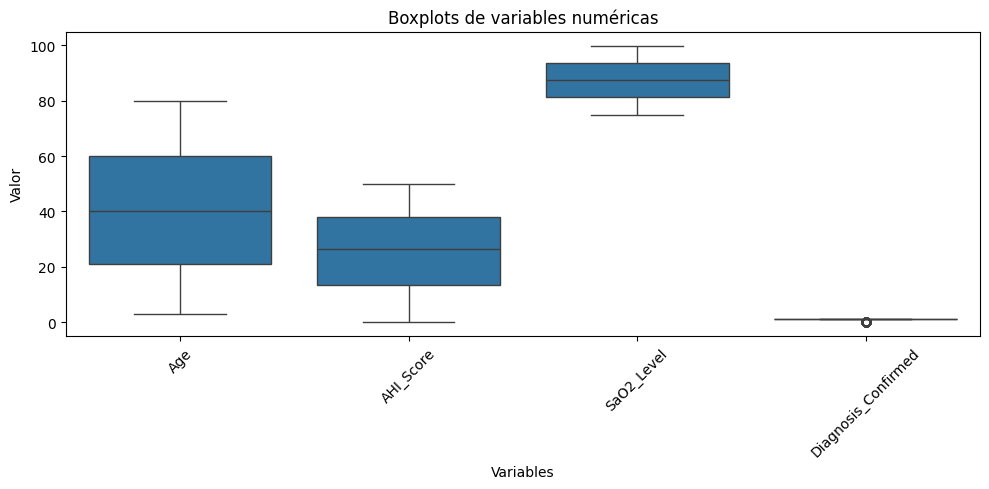

In [ ]:
#Boxplots (diagrama de caja) — Para variables numéricas individuales

# Seleccionar solo columnas numéricas
num_cols = df.select_dtypes(include=np.number)

# Transformar a formato largo
df_melted = pd.melt(num_cols)

# Graficar boxplots juntos
plt.figure(figsize=(10, 5))
sns.boxplot(x='variable', y='value', data=df_melted)
plt.title("Boxplots de variables numéricas")
plt.xlabel("Variables")
plt.ylabel("Valor")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Análisis univariante
- Es el análisis de una sola variable a la vez para:
- Explorar su distribución
- Identificar outliers o valores faltantes
- Entender su tipo (numérica, categórica, binaria, etc.)
- Decidir si necesita tratamiento adicional (transformación, escalado, imputación...)



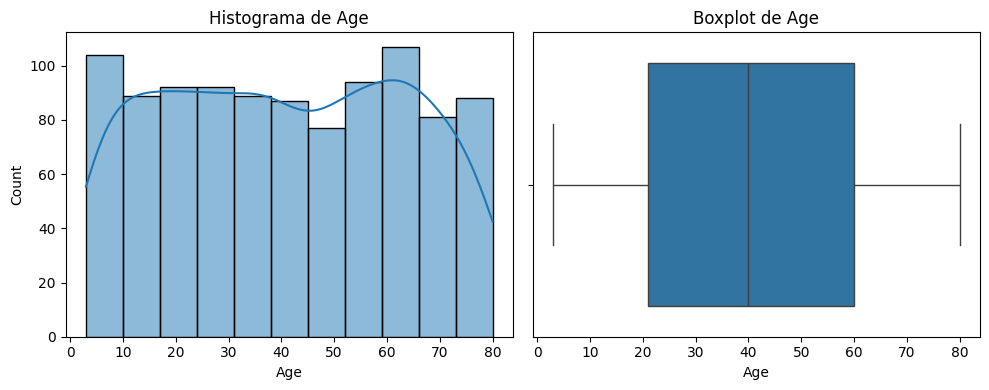

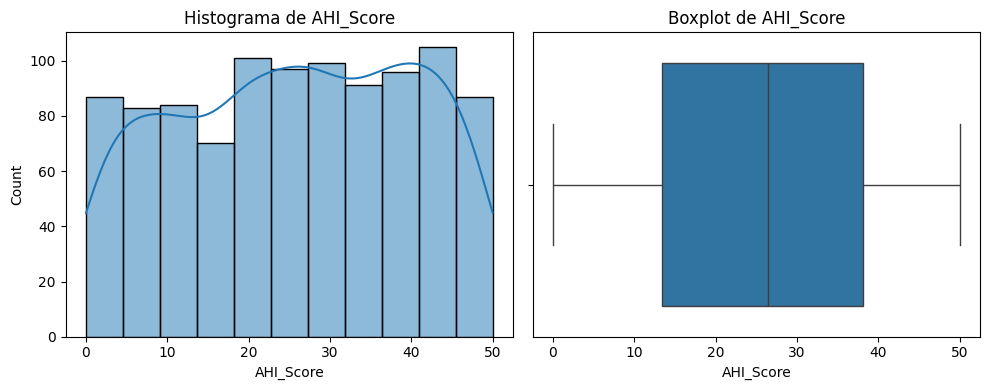

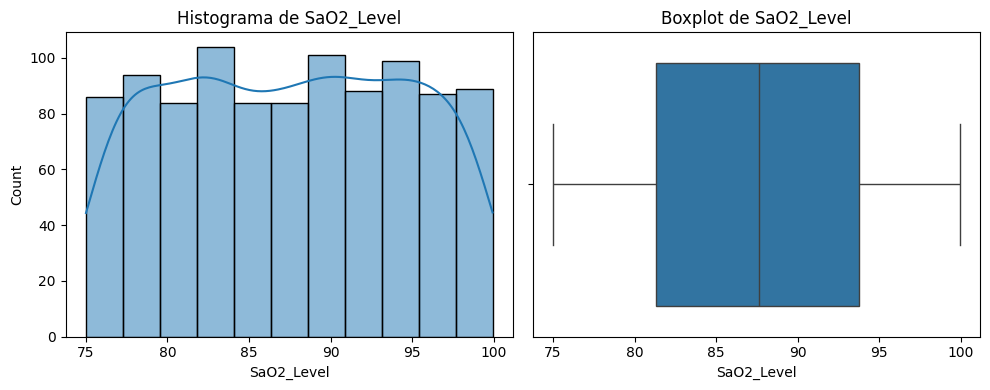

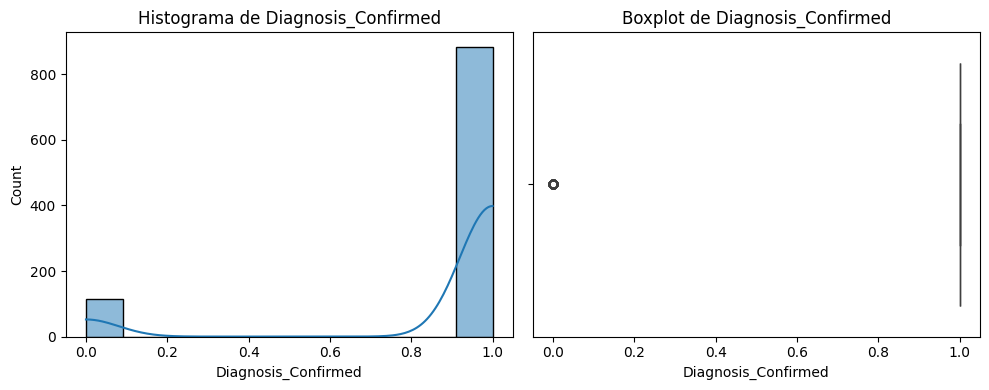

In [ ]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in numeric_cols:
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Histograma de {col}')

    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot de {col}')
    plt.tight_layout()
    plt.show()


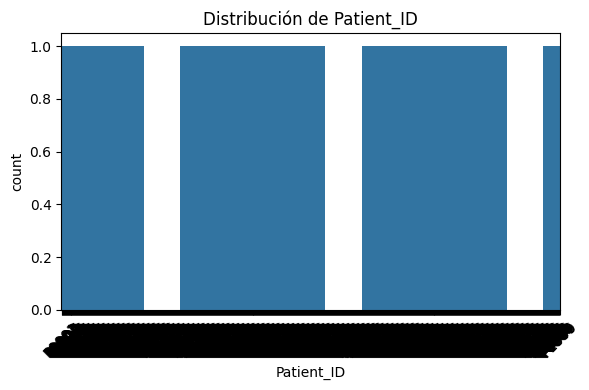

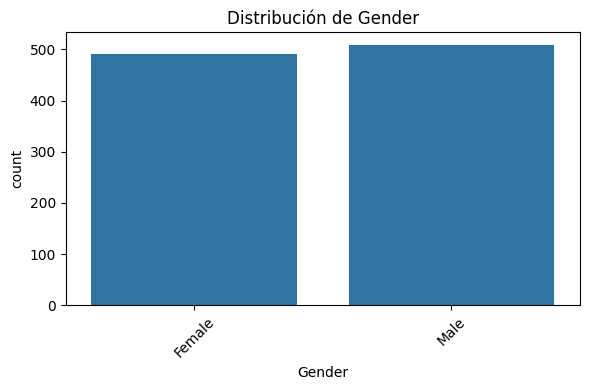

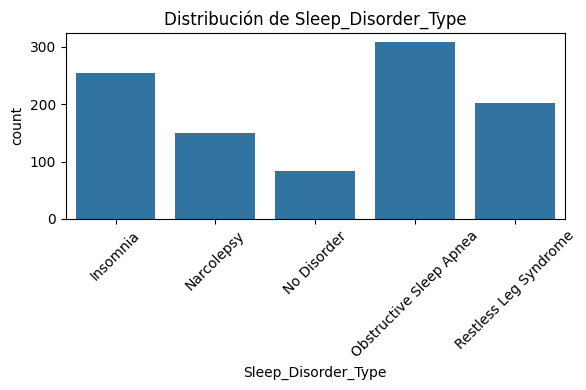

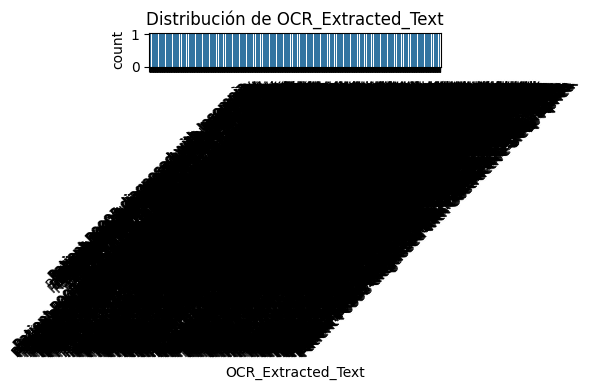

In [ ]:
categorical_cols = df.select_dtypes(include='category').columns

for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=df[col])
    plt.title(f'Distribución de {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


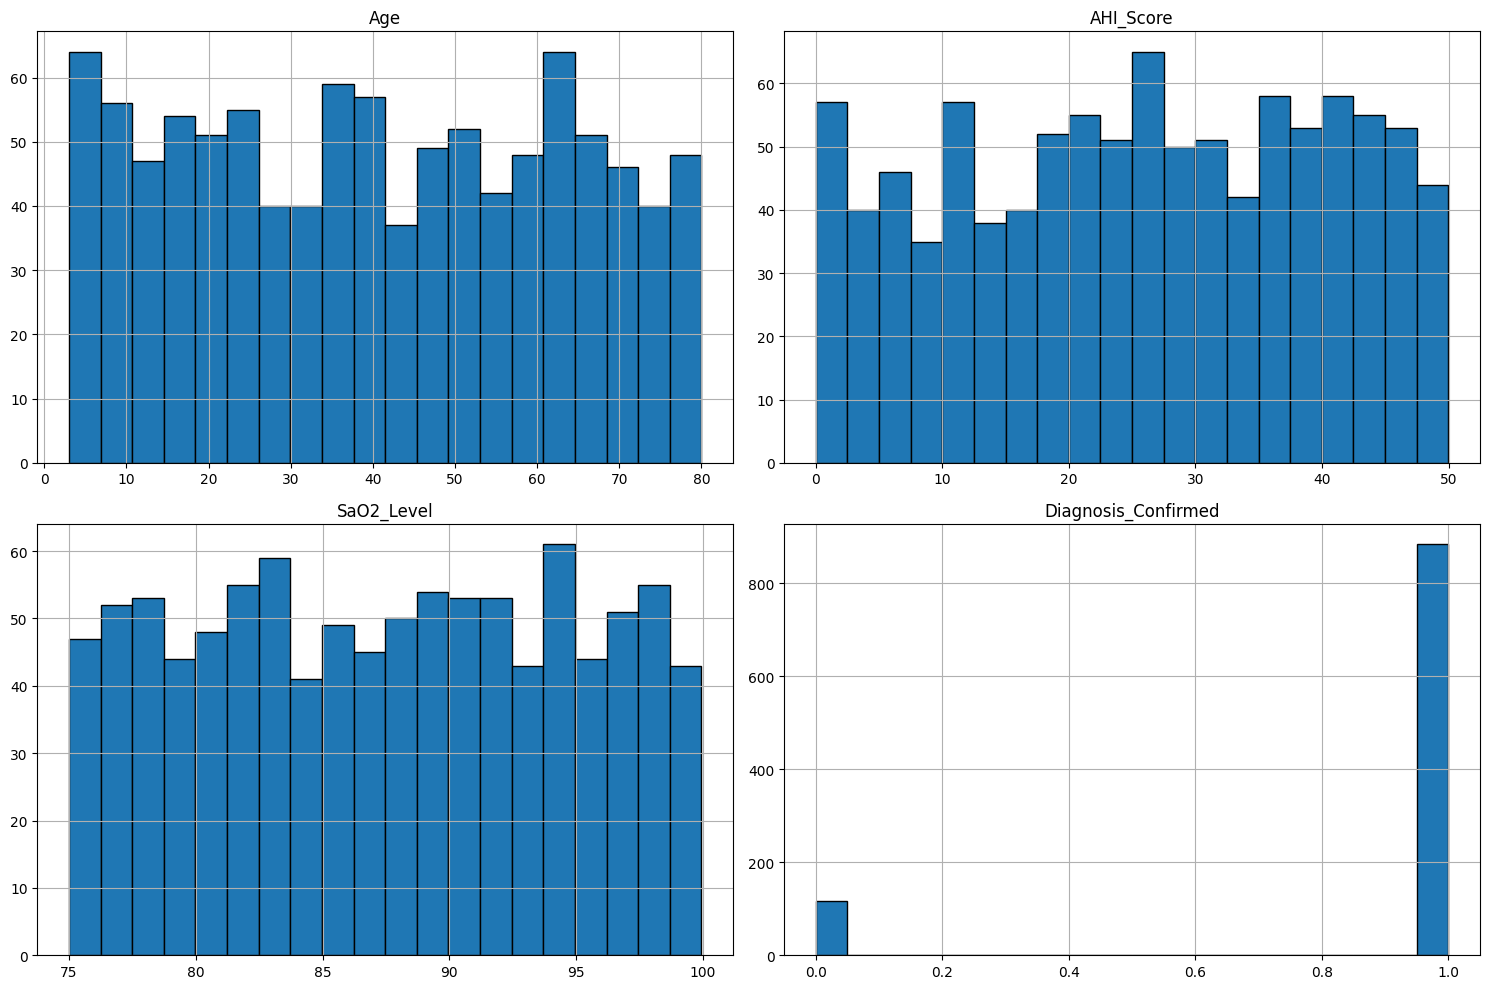

In [ ]:
# Histograma para variables numéricas
df.hist(bins=20, figsize=(15,10), edgecolor='black')
plt.tight_layout()
plt.show()

- ¿Para qué sirve el análisis univariante?
- Detectar errores y outliers
- Guiar transformaciones (por ejemplo, logaritmo si está sesgada)
- Diseñar encoding para modelado
- Entender la naturaleza de los datos antes del análisis multivariante

#### Análisis multivariante 
- El análisis multivariante te permite:
- Explorar relaciones entre variables.
- Identificar agrupamientos o patrones.
- Reducir dimensionalidad cuando tienes muchas variables.

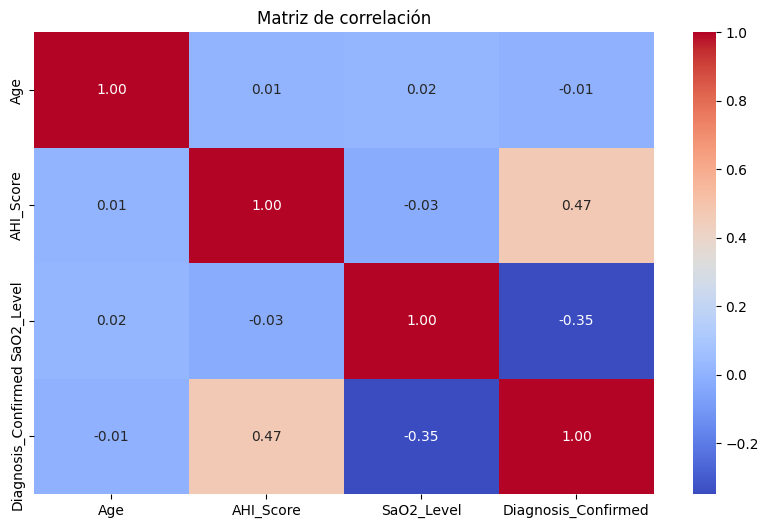

In [ ]:
# Matriz de correlaciones
plt.figure(figsize=(10,6))

# Select only numerical columns for correlation
numerical_df = df.select_dtypes(include=['float64', 'int64'])

sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de correlación")
plt.show()

---
#### Se analiza si dormir más se relaciona con mejor calidad del sueño.

In [ ]:
# Calidad de sueño vs. duración del sueño
sns.scatterplot(x='Sleep Duration', y='Quality of Sleep', hue='Gender', data=df)
plt.title('Sleep Duration vs Quality of Sleep')
plt.show()

ValueError: Could not interpret value `Sleep Duration` for `x`. An entry with this name does not appear in `data`.

---
#### Analizamos cómo varía la calidad del sueño entre quienes tienen o no trastornos.

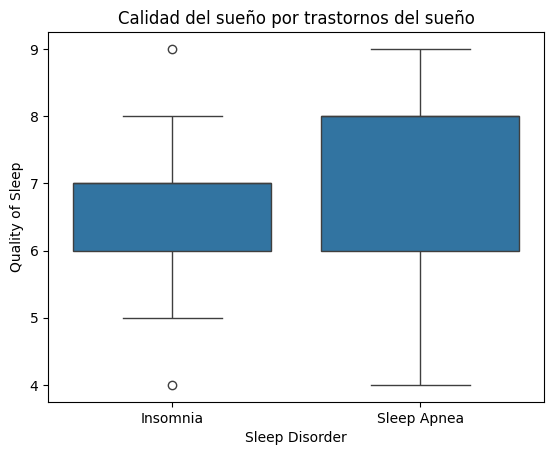

In [ ]:
# Boxplot: Calidad de sueño por tipo de trastorno
sns.boxplot(x='Sleep Disorder', y='Quality of Sleep', data=df)
plt.title('Calidad del sueño por trastornos del sueño')
plt.show()


---
#### Distribución de la duración del sueño

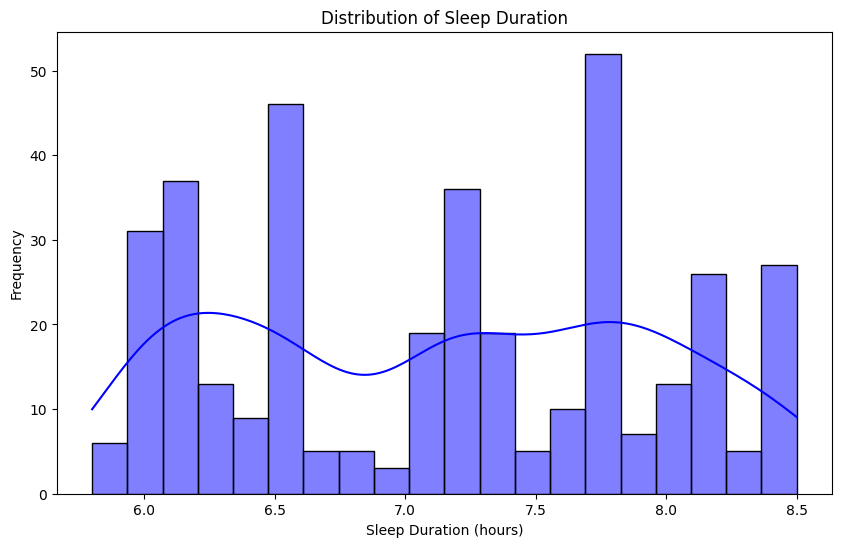

In [ ]:

plt.figure(figsize=(10, 6))
sns.histplot(df['Sleep Duration'], kde=True, bins=20, color='blue')
plt.title('Distribution of Sleep Duration')
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('Frequency')
plt.show()

---
#### Nos da una idea de cuántas personas tienen cada tipo de trastorno

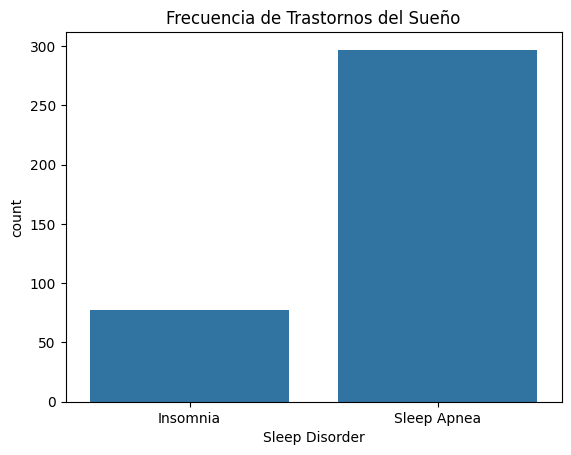

In [ ]:
# Conteo de cada tipo de trastorno del sueño
sns.countplot(x='Sleep Disorder', data=df)
plt.title('Frecuencia de Trastornos del Sueño')
plt.show()


---
####  Relacionamos si más actividad física se relaciona con menos estrés

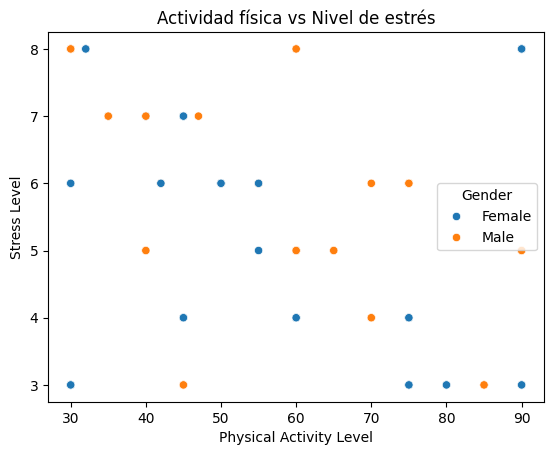

In [ ]:
sns.scatterplot(x='Physical Activity Level', y='Stress Level', hue='Gender', data=df)
plt.title('Actividad física vs Nivel de estrés')
plt.show()


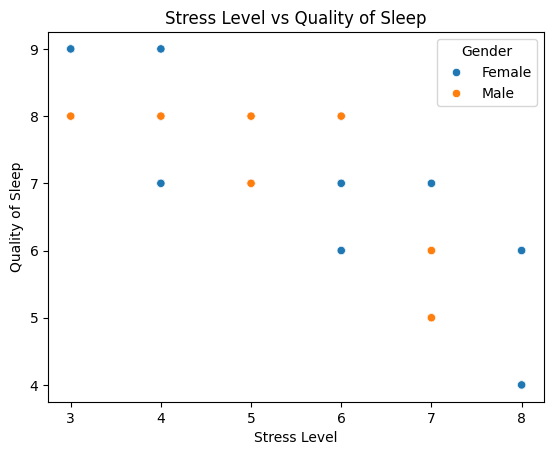

In [ ]:
# Bivariate Analysis: Relationship between Stress Level and Quality of Sleep
sns.scatterplot(x='Stress Level', y='Quality of Sleep', hue='Gender', data=df)
plt.title('Stress Level vs Quality of Sleep')
plt.xlabel('Stress Level')
plt.ylabel('Quality of Sleep')
plt.show()

----

### - Feature engineering
### - Modelado o pasos siguientes según el objetivo del proyecto


